# Linear Regression
Linear regression the expected value of $y$ is assumed to be a linear combination of the input variables $x_j$. In mathematical notion, if $\hat{y}$ is the predicted value.
$\hat{y}(\boldsymbol \beta, \mathbf x) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p$
The vector $\boldsymbol \beta$ and $\beta_0$ as `intercept_`.
Later we perform classification with generalized linear models, using logistic regression.

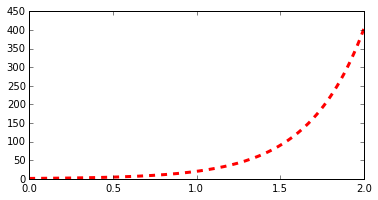

In [1]:
import numpy as np
x_tr = np.linspace(0., 2, 200)
y_tr = np.exp(3*x_tr)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr,"--r",lw=3);


Here are the available Line2D properties.
See matplotlib tutorial for more `pyplot` options [here](http://matplotlib.org/users/pyplot_tutorial.html), for scatter plot and other matplot pyplots see [here](http://matplotlib.org/api/pyplot_api.html).
Now we add noise to the pattern and produce an input and an output variable.

In [2]:
y = y_tr + 10*np.random.normal(loc=0, scale=5, size=len(x_tr))


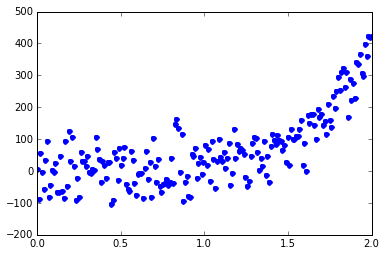

In [3]:
plt.plot(x_tr,y,".",mew=3);



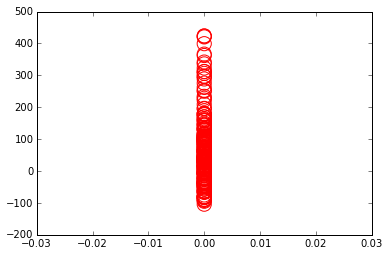

In [4]:
plt.scatter([0]*len(x_tr), y, s=200, facecolors='none', edgecolors='r')


for the list of generating random numbers see [here](http://docs.scipy.org/doc/numpy/reference/routines.random.html).
Now let's check the histogram and the marginal histogram of y.

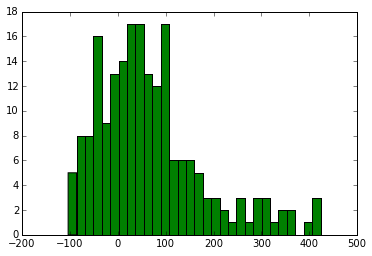

In [5]:
count, bins, ignored=plt.hist(y,30, color="g")

Now let's fit a linear model on y and x_tr.

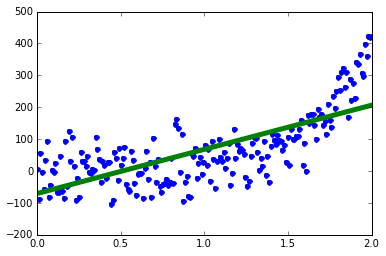

In [6]:
import sklearn.linear_model as lm
lr=lm.LinearRegression()
lr.fit(x_tr[:, np.newaxis],y)
y_hat=lr.predict(x_tr[:, np.newaxis])

plt.plot(x_tr,y,".",mew=3);
plt.plot(x_tr, y_hat,"-g",lw=5);

## Exercise
Replace $x$ with $x^2$ and fit the model $y=\beta_0+\beta_1 x^2$.

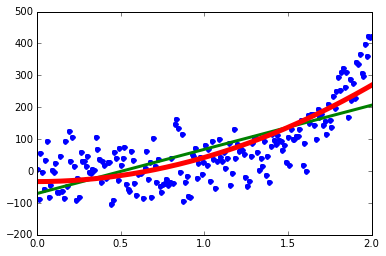

In [7]:
x_tr2= x_tr**2
lr.fit(x_tr2[:, np.newaxis],y)
y_hat2=lr.predict(x_tr2[:, np.newaxis])
plt.plot(x_tr,y,".",mew=3);
plt.plot(x_tr, y_hat,"-g",lw=3);
plt.plot(x_tr, y_hat2,"-r",lw=5);


# Fitting linear model for classification
Now suppose data $y$ is binary. This makes the cross-road between regression and classification.


(-1.5, 1.5)

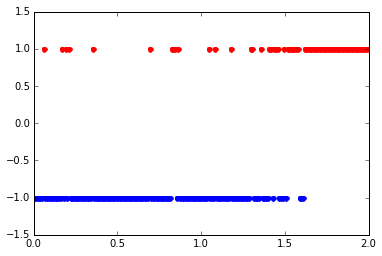

In [8]:
index=(y>90)
z=(1*(y>90)-0.5)*2
plt.figure()
plt.plot(x_tr[index],z[index],".r",mew=3)
plt.plot(x_tr[~index],z[~index],".b",mew=3)
plt.ylim(-1.5,1.5)





In [9]:
lr.fit(x_tr[:, np.newaxis],z)
z_hat=lr.predict(x_tr[:, np.newaxis])
z_class= 2*(z_hat>0)-1



0.845
0.155


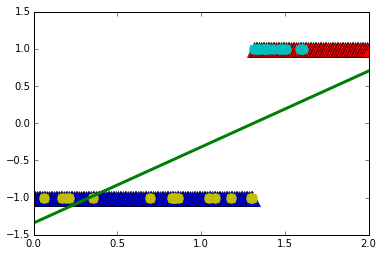

In [10]:
def plotbc(x, y,z):
    plt.plot(x[z==1],z[z==1],"^r", markersize=15)
    plt.plot(x[z==-1],z[z==-1],"^b", markersize=15)

    plt.plot(x[(z==-1) & (y==1)],z[(z==-1) & (y==1)],".y", markersize=20)
    plt.plot(x[(z==1) & (y==-1)],z[(z==1) & (y==-1)],".c", markersize=20)
    plt.ylim(-1.5,1.5)
def precision(y, z):
    print np.mean(y==z)
    print np.mean(y!=z)

plotbc(x_tr, z, z_class)
plt.plot(x_tr,z_hat,"-g",lw=3);
precision(z_class, z)


In [11]:
from sklearn import linear_model, datasets
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(x_tr[:, np.newaxis], z)
z_hat=logreg.predict(x_tr[:, np.newaxis])


0.865
0.135


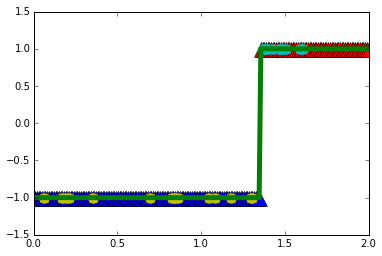

In [12]:
plotbc(x_tr, z, z_hat)
plt.plot(x_tr,z_hat,"-g",lw=5);
precision(z_hat, z)

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=.1, gamma=3.2)
clf.fit(x_tr[:, np.newaxis], z)
z_hat=clf.predict(x_tr[:, np.newaxis])

0.865
0.135


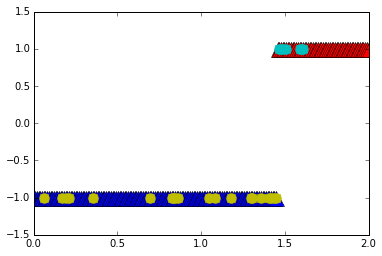

In [14]:
plotbc(x_tr, z, z_hat)
precision(z_hat, z)

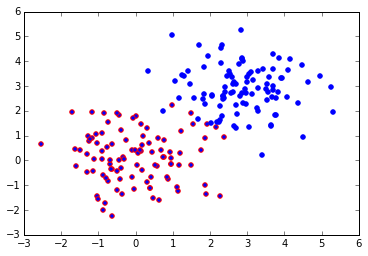

In [15]:
np.random.seed(0)
n=100
X=np.vstack((np.random.multivariate_normal([0,0],[[1,0],[0,1]] ,n), np.random.multivariate_normal([3,3],[[1,0],[0,1]] ,n)))
Y =np.array([0] * n + [1] * n)
index=(Y==0)
plt.scatter(X[index,0], X[index,1], edgecolors="r")
plt.scatter(X[~index,0], X[~index,1], edgecolors="b")

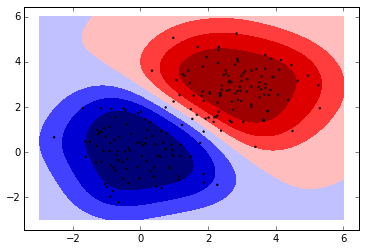

In [18]:
clf = svm.SVC(C=0.1)
clf.fit(X, Y)
Z=clf.predict(X)
index=(Z==0)
plt.scatter(X[index,0], X[index,1], edgecolors="r")
plt.scatter(X[~index,0], X[~index,1], edgecolors="b")
xx, yy = np.meshgrid(np.linspace(-3, 6, 500), np.linspace(-3, 6, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=1, cmap=plt.cm.seismic)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=2, alpha=0.9, cmap=plt.cm.spectral)

for the list of colormap options see [colormap help](http://matplotlib.org/users/colormaps.html) and to learn more about SVM and related options check [svm tutorial](http://scikit-learn.org/stable/modules/svm.html) and [support vector classification (svc) examples](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).